In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Dati organizzati per ogni iterazione
data = {
    'Iteration 1': {
        #'Hill Climbing Single-RM': (True, 284.04, 0),
        #'Hill Climbing Multiple-RM': (True, 284.04, 0),
        'Hill Climbing Multiple-RM 2° Version': (True, 284.04, 17),
        'Steepest step and restart': (True, 284.04, 57),
        'Simulated Annealing': (True, 284.049, 128),
        'Tabu Search': (True, 284.049, 14),
    },
    'Iteration 2': {
        #'Hill Climbing Single-RM': (True, 9766.25, 149),
        #'Hill Climbing Multiple-RM': (True, 8880.29, 148),
        'Hill Climbing Multiple-RM 2° Version': (True, 6575.57, 109),
        'Steepest step and restart': (True, 7602.34, 78),
        'Simulated Annealing': (True, 9870.83, 87),
        'Tabu Search': (True, 6981.76, 747),
    },
    'Iteration 3': {
        #'Hill Climbing Single-RM': (True, 3658931, 149),
        #'Hill Climbing Multiple-RM': (True, 3377215.60, 149),
        'Hill Climbing Multiple-RM 2° Version': (True, 136876.49, 109),
        'Steepest step and restart': (True, 137227.08, 74),
        'Simulated Annealing': (True, 187745.13, 39),
        'Tabu Search': (True, 135879.49652465072, 54),
    },
    'Iteration 4': {
        #'Hill Climbing Single-RM': (True, 247426117.35, 149),
        #'Hill Climbing Multiple-RM': (True, 245165050.98, 149),
        'Hill Climbing Multiple-RM 2° Version': (True, 2307796.53, 123),
        'Steepest step and restart': (False, 2287662.12, 78),
        'Simulated Annealing': (True, 2795211.14, 116),
        'Tabu Search': (True, 2202607.14, 400),
    },
    'Iteration 5': {
        #'Hill Climbing Single-RM': (True, 530360334.97, 149),
        #'Hill Climbing Multiple-RM': (True, 523419196.31, 149),
        'Hill Climbing Multiple-RM 2° Version': (True, 2204474.99, 140),
        'Steepest step and restart': (True, 2371263.10, 77),
        'Simulated Annealing': (True, 3228757.82, 49),
        'Tabu Search': (True, 2359428.83, 555),
    },
    'Iteration 6': {
       # 'Hill Climbing Single-RM': (True, 828537604.17, 149),
        #'Hill Climbing Multiple-RM': (True, 821135011.78, 149),
        'Hill Climbing Multiple-RM 2° Version': (True, 2272769.72, 93),
        'Steepest step and restart': (True, 22725225.80, 77),
        'Simulated Annealing': (True, 2526261.00, 41),
        'Tabu Search': (True, 2269879.96, 313),
    }
}


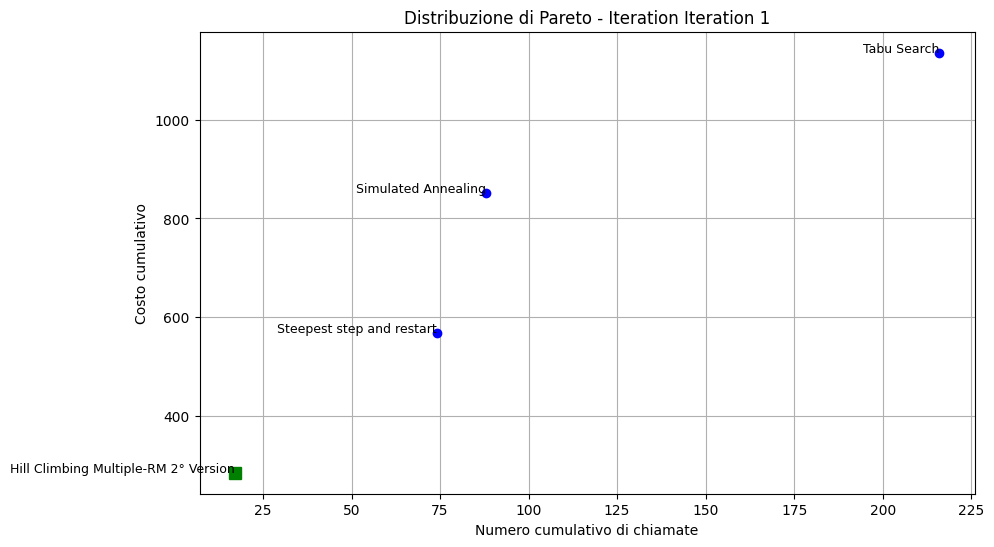

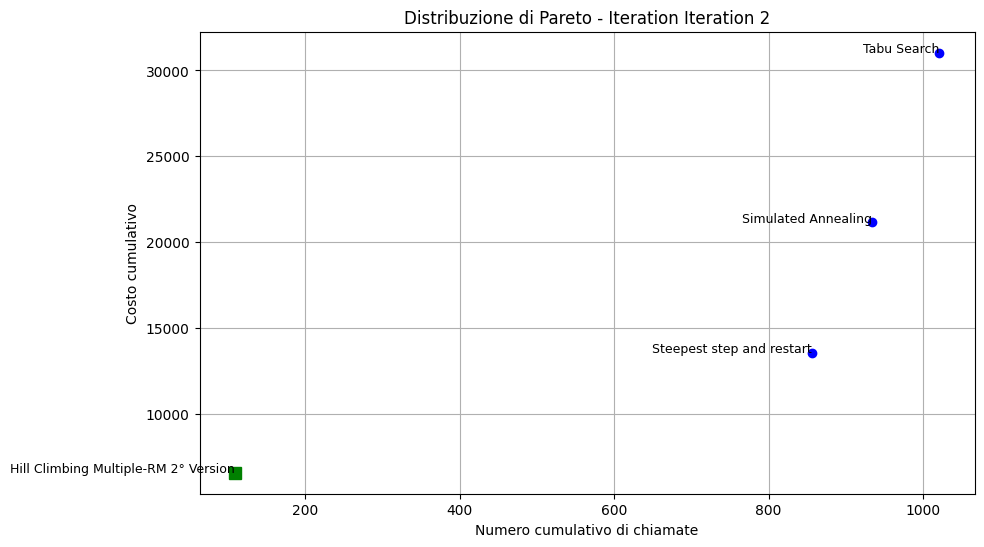

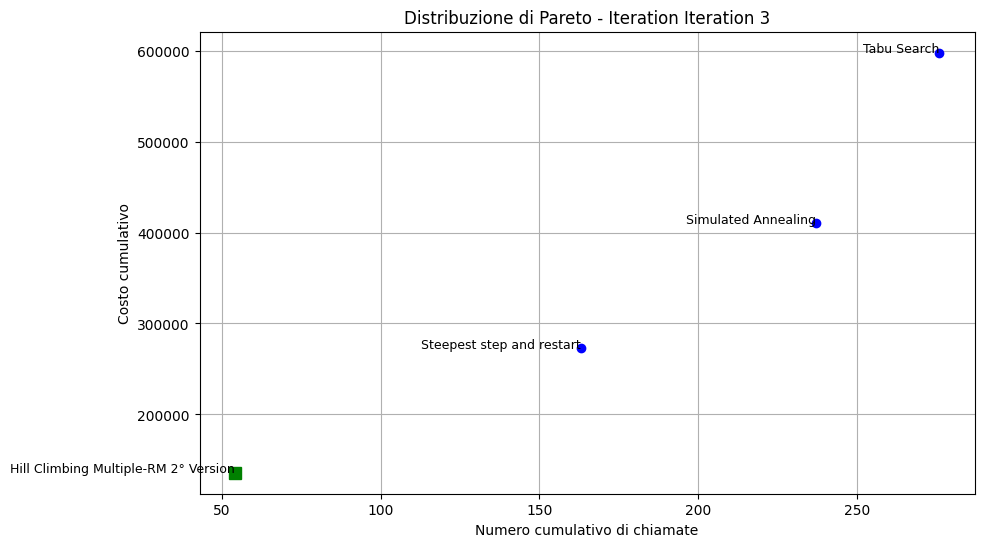

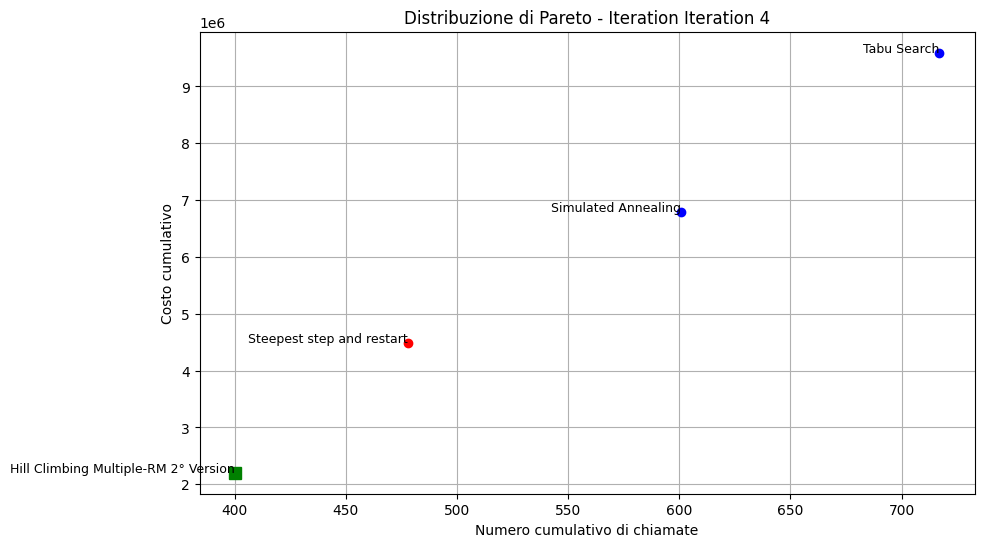

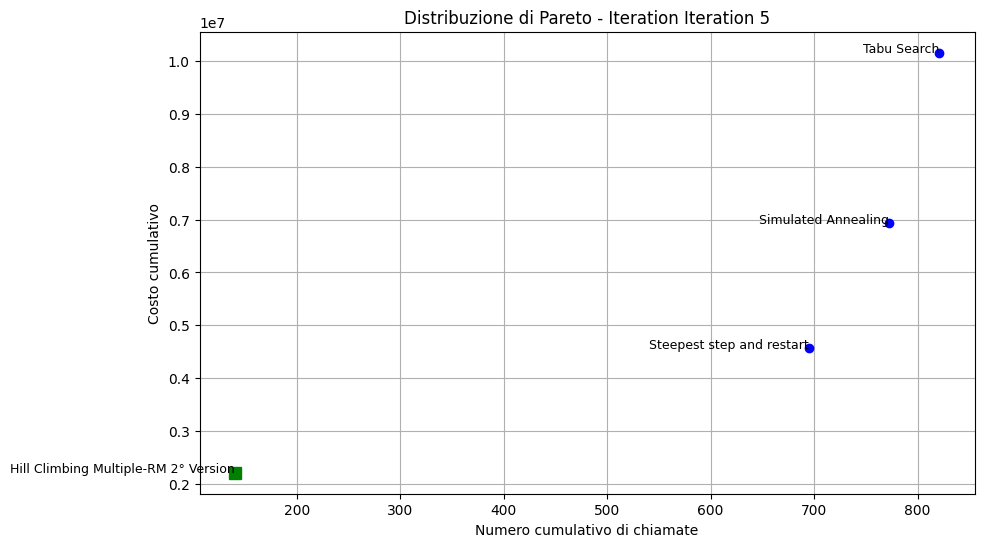

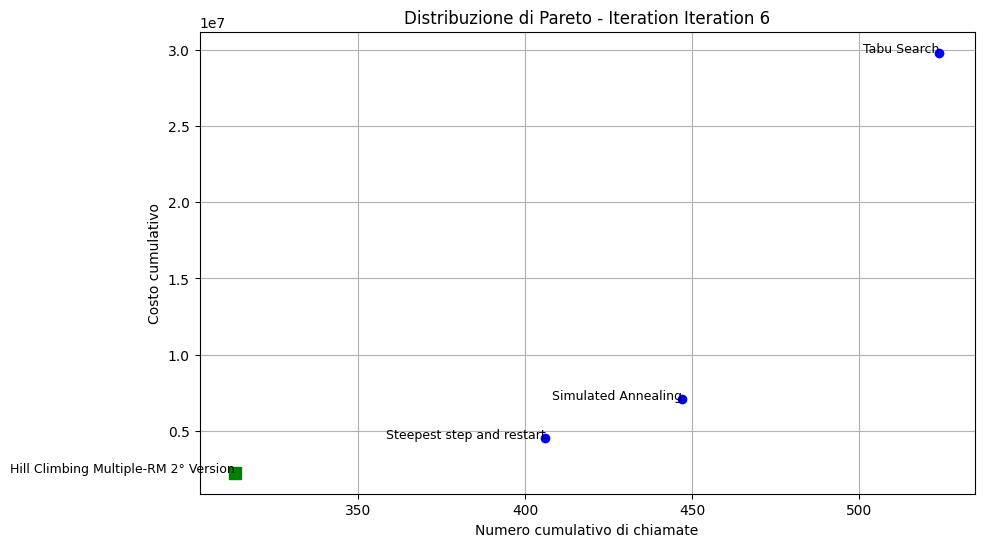

In [9]:
# Funzione per plottare la distribuzione di Pareto e trovare il Pareto front
def plot_pareto_distribution(data, iteration):
    algoritmi = []
    chiamate = []
    costi = []
    stati = []
    
    for algoritmo, (stato, costo, chiamate_num) in data.items():
        algoritmi.append(algoritmo)
        chiamate.append(chiamate_num)
        costi.append(costo)
        stati.append(stato)

    # Ordina i dati in base ai costi in ordine crescente
    sorted_data = sorted(zip(algoritmi, chiamate, costi, stati), key=lambda x: (x[2], x[1]))

    # Calcolo della somma cumulativa
    cumulative_chiamate = np.cumsum([x[1] for x in sorted_data])
    cumulative_costi = np.cumsum([x[2] for x in sorted_data])

    # Trova il Pareto front
    pareto_front = []
    for i in range(len(cumulative_costi)):
        is_dominated = False
        for j in range(len(cumulative_costi)):
            if cumulative_costi[j] <= cumulative_costi[i] and cumulative_chiamate[j] <= cumulative_chiamate[i] and j != i:
                is_dominated = True
                break
        if not is_dominated:
            pareto_front.append(i)

    # Plot della distribuzione di Pareto
    plt.figure(figsize=(10, 6))
    
    # Tracciamo i punti e evidenziamo il Pareto front
    for i in range(len(cumulative_costi)):
        color = 'b' if stati[i] else 'r'  # Blu per True, Rosso per False
        marker = 'o'
        if i in pareto_front:
            marker = 's'  # Quadrato per il Pareto front
        plt.plot(cumulative_chiamate[i], cumulative_costi[i], marker=marker, color=color)
        plt.text(cumulative_chiamate[i], cumulative_costi[i], algoritmi[i], fontsize=9, ha='right')

    # Aggiungi titolo e etichette
    plt.title(f'Distribuzione di Pareto - Iteration {iteration}')
    plt.xlabel('Numero cumulativo di chiamate')
    plt.ylabel('Costo cumulativo')

    # Aggiungi la linea del Pareto front
    for idx in pareto_front:
        plt.plot(cumulative_chiamate[idx], cumulative_costi[idx], 'gs', markersize=8)  # Quadrati verdi per il Pareto front

    plt.grid(True)
    plt.show()

# Plottare per ogni iterazione
for iteration, iteration_data in data.items():
    plot_pareto_distribution(iteration_data, iteration)

In [10]:
data = {
    'Iteration 1': {
        'Hill Climbing Single-RM': (True, 284.04, 1), 
        'Hill Climbing Multiple-RM': (True, 284.04, 1), 
        'Hill Climbing Multiple-RM 2° Version': (True, 284.04, 18), 
        'Steepest step and restart': (True, 284.04, 58),
        'Simulated Annealing': (True, 284.049, 129),
        'Tabu Search': (True, 284.049, 15), 
    },
    'Iteration 2': {
        'Hill Climbing Single-RM': (True, 9766.25, 150),
        'Hill Climbing Multiple-RM': (True, 8880.29, 149),
        'Hill Climbing Multiple-RM 2° Version': (True, 6575.57, 110), 
        'Steepest step and restart': (True, 7602.34, 79),
        'Simulated Annealing': (True, 9870.83, 88),
        'Tabu Search': (True, 6981.76, 748), 
    },
    'Iteration 3': {
        'Hill Climbing Single-RM': (True, 3658931, 150),
        'Hill Climbing Multiple-RM': (True, 3377215.60, 150),
        'Hill Climbing Multiple-RM 2° Version': (True, 136876.49, 110), 
        'Steepest step and restart': (True, 137227.08, 75), 
        'Simulated Annealing': (True, 187745.13, 40),
        'Tabu Search': (True, 135879.49652465072, 54), 
    },
    'Iteration 4': {
        'Hill Climbing Single-RM': (True, 247426117.35, 150),
        'Hill Climbing Multiple-RM': (True, 245165050.98, 150),
        'Hill Climbing Multiple-RM 2° Version': (True, 2307796.53, 124), 
        'Steepest step and restart': (False, 2287662.12, 79),
        'Simulated Annealing': (True, 2795211.14, 117),
        'Tabu Search': (True, 2202607.14, 401), 
    },
    'Iteration 5': {
        'Hill Climbing Single-RM': (True, 530360334.97, 150),
        'Hill Climbing Multiple-RM': (True, 523419196.31, 150),
        'Hill Climbing Multiple-RM 2° Version': (True, 2204474.99, 141), 
        'Steepest step and restart': (True, 2371263.10, 78), 
        'Simulated Annealing': (True, 3228757.82, 50),
        'Tabu Search': (True, 2359428.83, 556), 
    },
    'Iteration 6': {
        'Hill Climbing Single-RM': (True, 828537604.17, 150),
        'Hill Climbing Multiple-RM': (True, 821135011.78, 150),
        'Hill Climbing Multiple-RM 2° Version': (True, 2272769.72, 94), 
        'Steepest step and restart': (True, 22725225.80, 78), 
        'Simulated Annealing': (True, 2526261.00, 42), 
        'Tabu Search': (True, 2269879.96, 314), 
    }
}


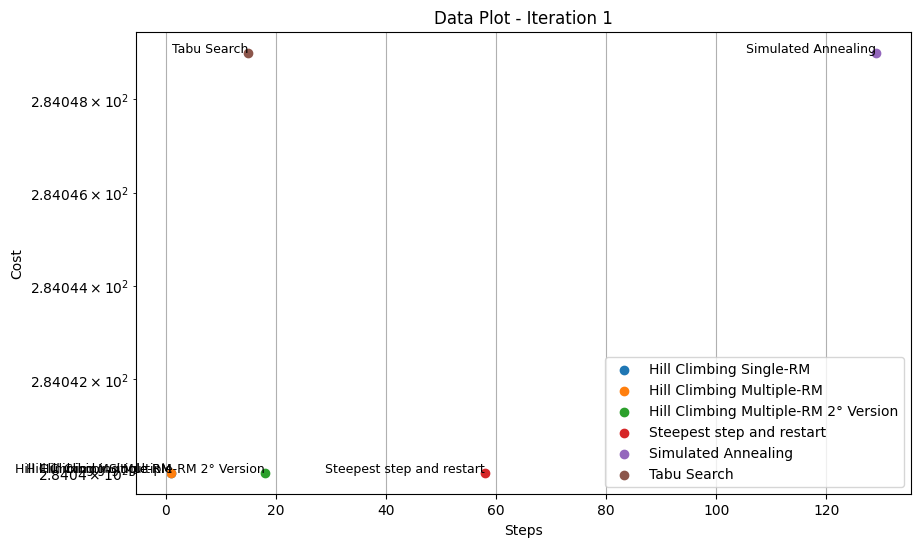

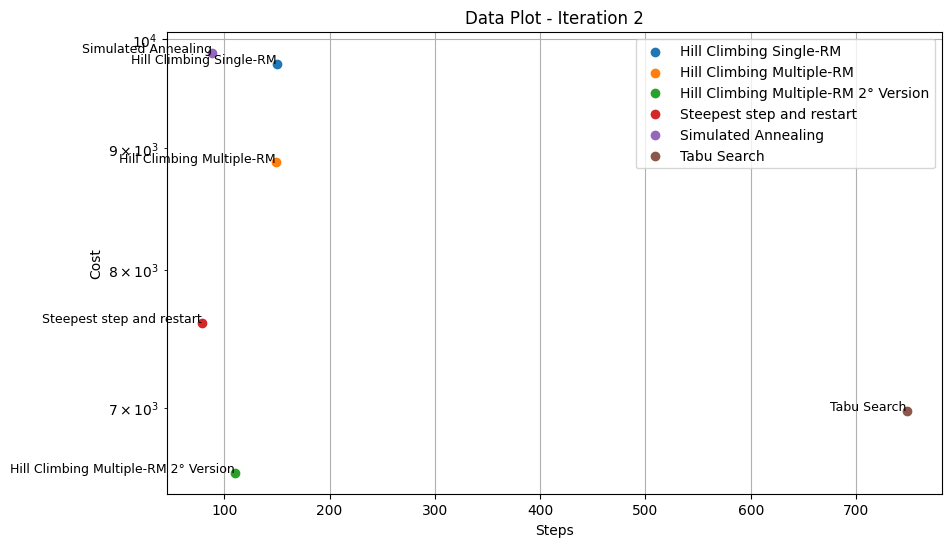

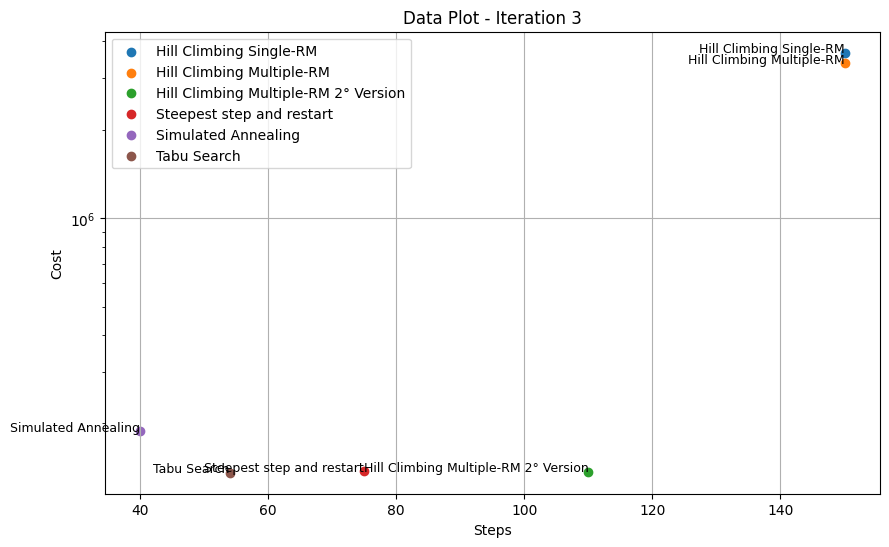

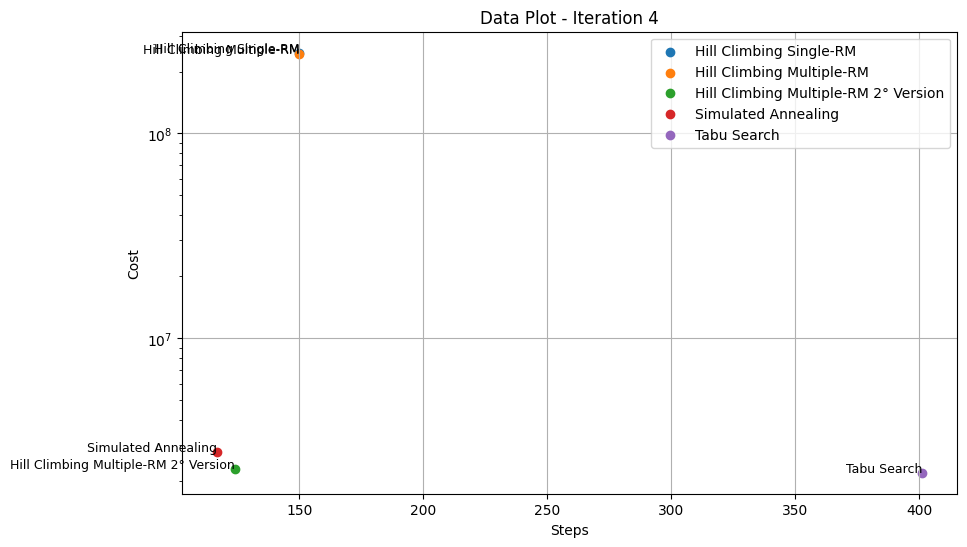

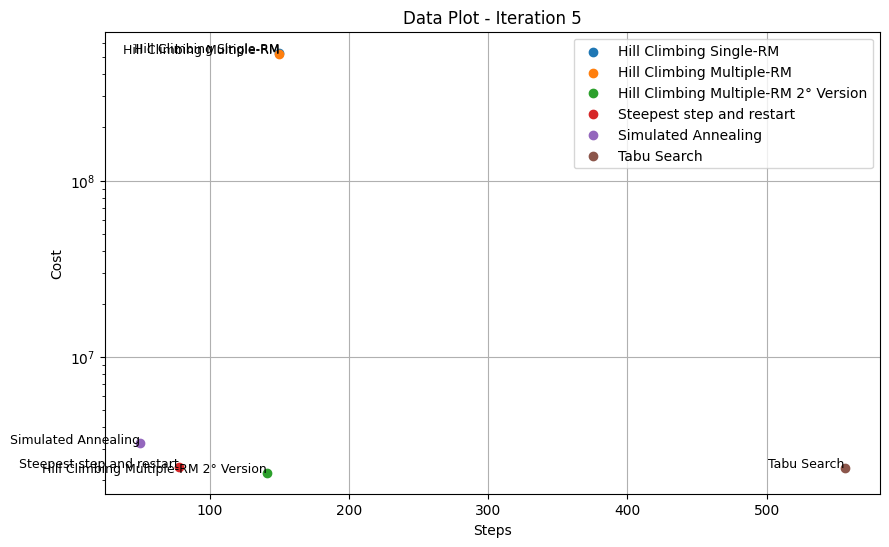

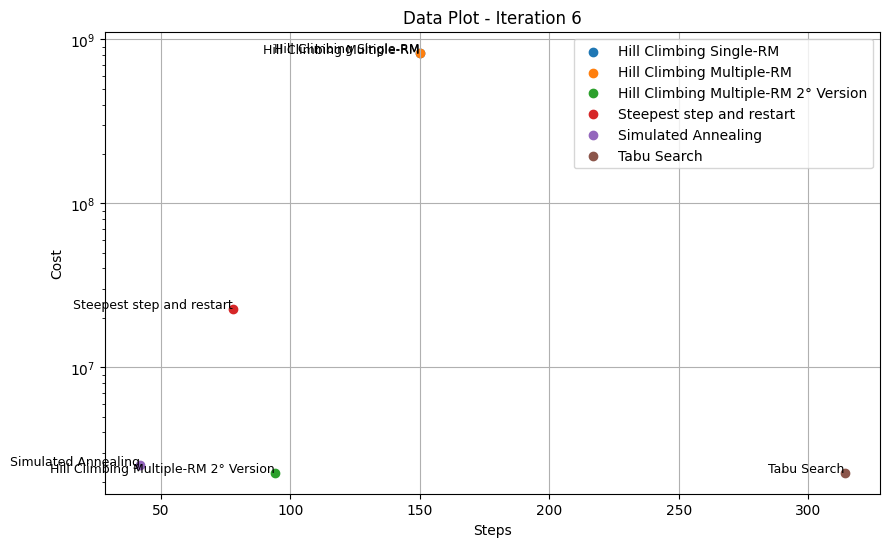

In [11]:
import matplotlib.pyplot as plt

# Funzione per plottare i risultati con i nomi degli algoritmi
def plot_data_with_labels(iteration, data):
    plt.figure(figsize=(10, 6))

    for algorithm, (success, cost, steps) in data.items():
        if success:  # Considera solo i risultati validi
            plt.scatter(steps, cost, label=algorithm)
            plt.text(steps, cost, algorithm, fontsize=9, ha='right')

    # Imposta scala logaritmica sull'asse dei costi per una migliore visualizzazione
    plt.yscale('log')

    # Aggiungi titoli e etichette
    plt.title(f'Data Plot - {iteration}')
    plt.xlabel('Steps')
    plt.ylabel('Cost')

    # Mostra la legenda e la griglia
    plt.legend()
    plt.grid(True)

    # Mostra il plot
    plt.show()

# Funzione per plottare i dati di tutte le iterazioni
def plot_all_iterations(data):
    for iteration, results in data.items():
        plot_data_with_labels(iteration, results)

# Esegui il plot per tutte le iterazioni
plot_all_iterations(data)


In [12]:
# Dati forniti
data = {
    'Iteration 1': {
        'Hill Climbing Single-RM': (True, 284.04, 1),
        'Hill Climbing Multiple-RM': (True, 284.04, 1),
        'Hill Climbing Multiple-RM 2° Version': (True, 284.04, 18),
        'Steepest step and restart': (True, 284.04, 58),
        'Simulated Annealing': (True, 284.049, 129),
        'Tabu Search': (True, 284.049, 15),
    },
    'Iteration 2': {
        'Hill Climbing Single-RM': (True, 9766.25, 150),
        'Hill Climbing Multiple-RM': (True, 8880.29, 149),
        'Hill Climbing Multiple-RM 2° Version': (True, 6575.57, 110),
        'Steepest step and restart': (True, 7602.34, 79),
        'Simulated Annealing': (True, 9870.83, 88),
        'Tabu Search': (True, 6981.76, 748),
    },
    'Iteration 3': {
        'Hill Climbing Single-RM': (True, 3658931, 150),
        'Hill Climbing Multiple-RM': (True, 3377215.60, 150),
        'Hill Climbing Multiple-RM 2° Version': (True, 136876.49, 110),
        'Steepest step and restart': (True, 137227.08, 75),
        'Simulated Annealing': (True, 187745.13, 40),
        'Tabu Search': (True, 135879.49652465072, 54),
    },
    'Iteration 4': {
        'Hill Climbing Single-RM': (True, 247426117.35, 150),
        'Hill Climbing Multiple-RM': (True, 245165050.98, 150),
        'Hill Climbing Multiple-RM 2° Version': (True, 2307796.53, 124),
        'Steepest step and restart': (False, 2287662.12, 79),
        'Simulated Annealing': (True, 2795211.14, 117),
        'Tabu Search': (True, 2202607.14, 401),
    },
    'Iteration 5': {
        'Hill Climbing Single-RM': (True, 530360334.97, 150),
        'Hill Climbing Multiple-RM': (True, 523419196.31, 150),
        'Hill Climbing Multiple-RM 2° Version': (True, 2204474.99, 141),
        'Steepest step and restart': (True, 2371263.10, 78),
        'Simulated Annealing': (True, 3228757.82, 50),
        'Tabu Search': (True, 2359428.83, 556),
    },
    'Iteration 6': {
        'Hill Climbing Single-RM': (True, 828537604.17, 150),
        'Hill Climbing Multiple-RM': (True, 821135011.78, 150),
        'Hill Climbing Multiple-RM 2° Version': (True, 2272769.72, 94),
        'Steepest step and restart': (True, 22725225.80, 78),
        'Simulated Annealing': (True, 2526261.00, 42),
        'Tabu Search': (True, 2269879.96, 314),
    }
}



# Funzione per calcolare il miglior algoritmo
def calcola_miglior_algoritmo(data):
    punteggi_totali = {}
    peso_step = 1 # Peso per il numero di steps
    # Iteriamo su tutte le iterazioni
    for iterazione, algoritmi in data.items():
        print(f"Analizzando {iterazione}...")
        # Per ogni algoritmo all'interno dell'iterazione
        for algoritmo, (successo, costo, steps) in algoritmi.items():
            if successo:
                # Calcola il punteggio
                punteggio = costo + (peso_step* steps)
                # Aggiungi il punteggio alla somma totale per l'algoritmo
                if algoritmo in punteggi_totali:
                    punteggi_totali[algoritmo] += punteggio
                else:
                    punteggi_totali[algoritmo] = punteggio

    # Trova l'algoritmo con il punteggio totale più basso
    miglior_algoritmo = min(punteggi_totali, key=punteggi_totali.get)
    
    return miglior_algoritmo, punteggi_totali

# Calcolo del miglior algoritmo
miglior_algoritmo, punteggi_totali = calcola_miglior_algoritmo(data)

# Risultati
print("Miglior algoritmo:", miglior_algoritmo)
print("Punteggi totali per ogni algoritmo:")
for algoritmo, punteggio in punteggi_totali.items():
    print(f"{algoritmo}: {punteggio:.2f}")


Analizzando Iteration 1...
Analizzando Iteration 2...
Analizzando Iteration 3...
Analizzando Iteration 4...
Analizzando Iteration 5...
Analizzando Iteration 6...
Miglior algoritmo: Hill Climbing Multiple-RM 2° Version
Punteggi totali per ogni algoritmo:
Hill Climbing Single-RM: 1609993788.78
Hill Climbing Multiple-RM: 1593106389.00
Hill Climbing Multiple-RM 2° Version: 6929374.34
Steepest step and restart: 25241970.36
Simulated Annealing: 8748595.97
Tabu Search: 6977149.24
